<img src="images/cs5228-header-title.png" />

# Assignment 4 - Linear Models, Recommender Systems & Graph Mining (50 Points)

Hello everyone, this assignment notebook covers Linear Models, Recommender Systems & Graph Mining. There are some code-completion tasks and question-answering tasks in this answer sheet. For code completion tasks, please write down your answer (i.e., your lines of code) between sentences that "Your code starts here" and "Your code ends here". The space between these two lines does not reflect the required or expected lines of code. For answers in plain text, you can refer to [this Markdown guide](https://medium.com/analytics-vidhya/the-ultimate-markdown-guide-for-jupyter-notebook-d5e5abf728fd) to customize the layout (although it shouldn't be needed).

When you work on this notebook, you can insert additional code cells (e.g., for testing) or markdown cells (e.g., to keep track of your thoughts). However, before the submission, please remove all those additional cells again. Thanks!

**Important:** 
* Remember to rename and save this Jupyter notebook as **A4_YourName_YourNUSNETID.ipynb** (e.g., **A4_BobSmith_e12345678.ipynb**) before submission!
* Remember to rename and save the Python script file **A4_YourName_YourNUSNETID.py** (e.g., **A4_BobSmith_e12345678.py**) before submission!
* Submission deadline is **Nov 07, 11.59 pm**. Late submissions will be penalized by 10% for each additional day. Failure to appropriately rename both files will yield a penalty of 1 Point. There is no need to use your full name if it's rather long; it's just important to easily identify you in Canvas etc.

Please also add your NUSNET and student id in the code cell below. This is just to make any identification of your notebook doubly sure.

In [ ]:
student_id = 'A0255954R'
nusnet_id = 'e0962966'

Here is an overview over the tasks to be solved and the points associated with each task. The notebook can appear very long and verbose, but note that a lot of parts are there to provide additional explanations, documentation, or some discussion. The code and markdown cells you are supposed to complete are well marked, but you can use the overview below to double-check that you covered everything.

* **1 Logistic Regression (20 Points)**
    * 1.1 Implementing Logistic Regression (12 Points)
        * 1.1 a) Calculating the Gradient (4 Points)
        * 1.1 b) Implementing Gradient Descent (3 Points)
        * 1.1 c) Predicting Labels (2 Points)
        * 1.1 d) Hyperparameter Tuning "By Hand" and Interpretation of Results (3 Points)
    * 1.2 Questions about Logistic Regression (8 Points)
* **2 Recommender Systems (20 Points)**
    * 2.1 Matrix Factorization (15 Points)
        * 2.1 a) Implement Method `fit()` (8 Points)
        * 2.1 b) Hyperparameter Exploration (2 Points)        
        * 2.1 c) Matrix Factorization & Updates (5 Points)
    * 2.2 Questions about Recommender Systems (5 Points)
* **3 Graph Mining: Community Detection (10 Points)**
    * 3.1 Implement Girvan-Newman Algorithm (4 Points)
    * 3.2 Question about Girvan-Newman Algorithm (6 Points)

## Setting up the Notebook

In [1]:
# Some magic so that the notebook will reload the external python script file any time you edit and save the .py file;
%load_ext autoreload
%autoreload 2

Making all the required imports:

In [2]:
import numpy as np
import pandas as pd
import networkx as nx

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

import matplotlib.pyplot as plt
from src.utils import plot_mrt_graph

np.set_printoptions(precision=3)

**Important:** This notebook also requires you to complete in a separate `.py` script file. This keeps this notebook cleaner and simplifies testing your implementations for us. As you need to rename the file `A4.py`, you also need to edit the import statement below accordingly.

In [1]:
from A4_WuTong_e0962966 import MyLogisticRegression, NMF, girvan_newman
#from A4_BobSmith_e12345678 import MyLogisticRegression, NMF, girvan_newman # <-- you will need to rename this accordingly

---

## 1 Logistic Regression

### Dataset Preparation & Visualization (nothing for you to do here)

For this task, we use the [Banknote Authentication Dataset](https://archive.ics.uci.edu/ml/datasets/banknote+authentication). It contains 1,371 samples, each with 4 numerical features (variance, skewness, kurtosis, and entropy of an image) to predict whether a bank note is genuine or a forgery. We use this dataset mainly for convenience. It basically does not require any data preprocessing as all features are numerical, and there are no "dirty" records. There is also no need for normalization/standardization as all features values are about the same range.

**Load & Prepare Dataset.** First, let's load the dataset into a pandas dataframe and have a quick look:

In [4]:
df_bank = pd.read_csv('data/a4-banknote-authentication.csv')

df_bank.head()

variance  skewness  curtosis  entropy  class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0

For further processing, we convert the data into numpy arrays; pandas provides convenient methods for that. We also split the data into the input features and the target variable, with the latter being the last column in our data matrix. Lastly, we use `train_test_split` from scitkit-learn to split our dataset into the training and test data. We set the `random_state` to ensure consistent results throughout this task.

In [5]:
# Convert pandas dataframe into numpy array
data = df_bank.to_numpy()

# Separate input features from target variable
X_bank = data[:,:-1]
y_bank = data[:,-1].astype(int)

# Split into training and test set; we use a common 80/20 split here
X_bank_train, X_bank_test, y_bank_train, y_bank_test = train_test_split(X_bank, y_bank, test_size=0.2, random_state=0)

**Visualization.** It never hurts to first have a quick look at the data. Since we have 4 input features, plotting the data points based on all features is not really possible. What we can do however, since we only have 4 features, we can generate the plots for all *pairs* of features. The code cell below accomplishes this.

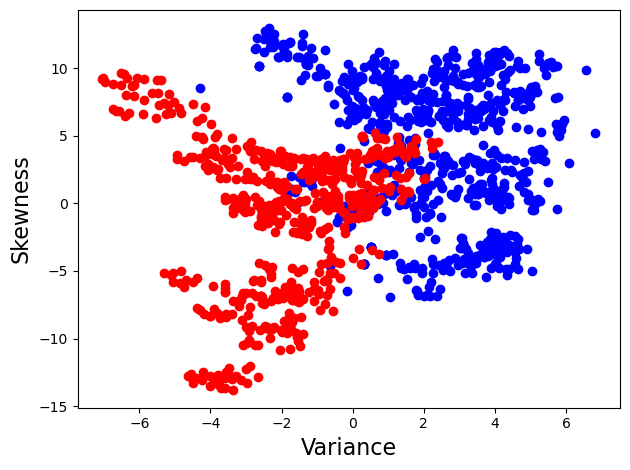

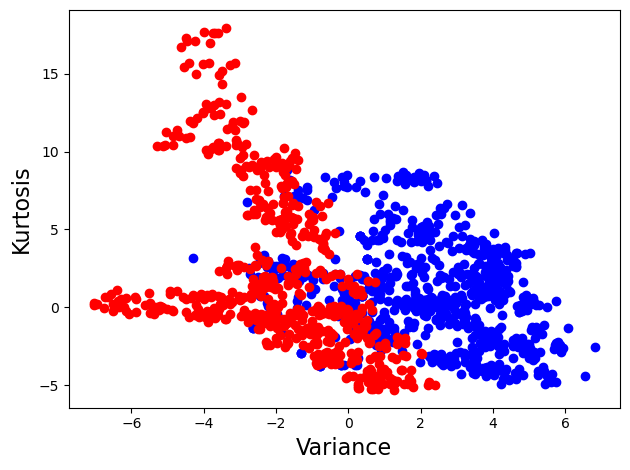

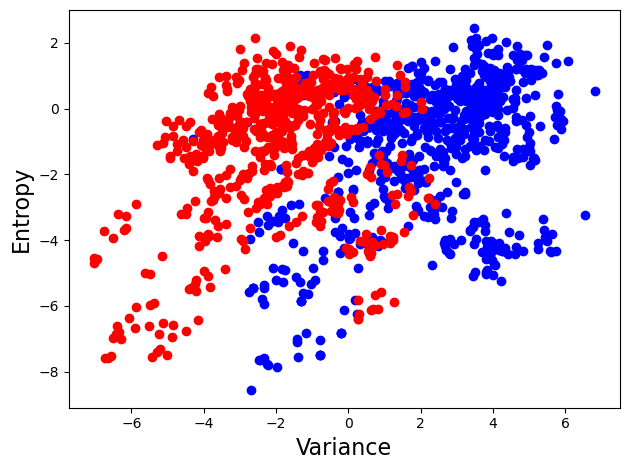

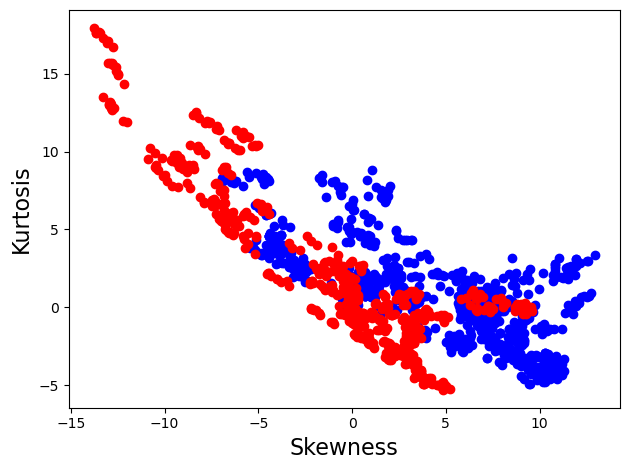

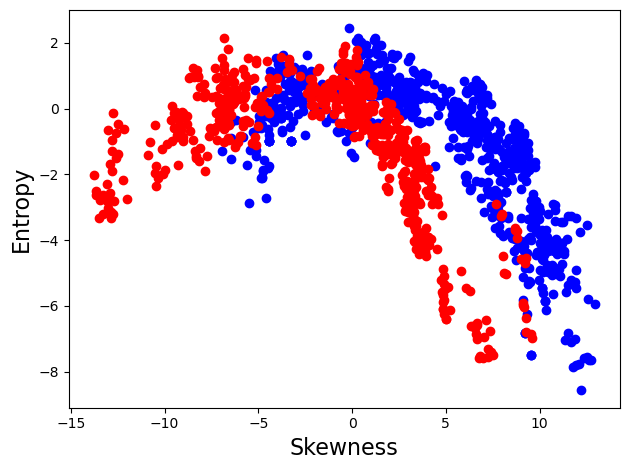

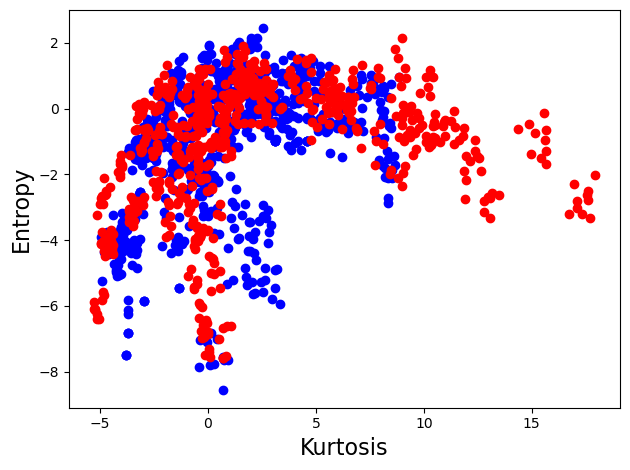

In [6]:
indices_0 = np.where(y_bank==0)
indices_1 = np.where(y_bank==1)

features = ['Variance', 'Skewness', 'Kurtosis', 'Entropy']

for feautre_1 in range(X_bank.shape[1]):
    for feature_2 in range(feautre_1+1, X_bank.shape[1]):
        plt.figure()
        plt.scatter(X_bank[:,feautre_1][indices_0], X_bank[:,feature_2][indices_0], c='blue')
        plt.scatter(X_bank[:,feautre_1][indices_1], X_bank[:,feature_2][indices_1], c='red')
        plt.xlabel(features[feautre_1], fontsize=16)
        plt.ylabel(features[feature_2], fontsize=16)
        plt.tight_layout()
        plt.show()

From the plots we can see that some of the input features seem to be quite helpful in separating the two classes. For example, if we would only use Variance and Skewness (first plot), we could probably get out a decent classifier. In contrast, considering only Kurtosis and Entropy (last plot), we see only a very poor separation of the class labels, so we would not be able to train a good classifier. Summing up, since already some subsets of features seem to be quite useful, we can expect that considering all features will potentially yield very good results.

**Training an off-the-shelf Logistic Regression model.** Before you will implement and test your own Logistic Regression classifier, let's first use [`sklearn.linear_model.LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). This will give us a first idea what accuracy result we can aim for.

In [7]:
# Train Logistic Regression model over training data
sk_logreg = LogisticRegression().fit(X_bank_train, y_bank_train)

# Predict labels for test data
y_bank_sk_pred = sk_logreg.predict(X_bank_test)

# Print results (i.e., comparing predicted labels with groundtruth labels of test data)
print('f1 score (test): {:.3f}'.format(f1_score(y_bank_sk_pred, y_bank_test)))

# Show number of iterations (for a later comparison)
print('Number of iterations: {}'.format(sk_logreg.n_iter_[0]))

f1 score (test): 0.992
Number of iterations: 23


The results indeed confirm that we can expect to get very good results with our own implementation.

### 1.1 Implementing Logistic Regression (14 Points)

Your task here is to implement a Logistic Regression Classifier for binary classification. One learning outcome is actually to show how quick and easy this is. Below you can find the skeleton code for the class implementing the Logistic Regression Classifier. You will need to complete this code step by step along with the subtasks 2.1 a-c). 

We give you two basic methods for free so you can focus on the core parts:

* `add_bias()` adds the constant feature value $x_0 = 1$ for each data sample to implement the "bias trick"
* `calc_closs()` computes the Cross Entropy loss for the binary case, i.e., directly implementing the formula below

$$ L = -\frac{1}{n} \sum_{i=1}^n \left[ y_i\log{\hat{y}_i} + (1-y_i)\log{(1- \hat{y}_i} )\right]$$

#### 1.1 a) Calculating the Gradient (4 Points)

Given the non-linear nature of the loss function for the Logistic Regression, we cannot find the best $\theta$ values that minimize the loss function analytically. Hence, we have to implement it using Gradient Descent. Here, instead of calculating the $\nabla_\theta L$, setting it to 0, and solving for $\theta$, we start with initial parameter values for $\theta$, calculate the respective gradient, and update $\theta$ to reduce the loss $L$ iteratively.

The gradient for loss $L$ w.r.t. to $\theta$ is given as:

$$\nabla_\theta L = \frac{2}{n} X^T(h_\theta(X) - y)\ \text{, with }\ h_\theta(x_i) = \frac{1}{1+ e^{-\theta^{T}x_i}}$$


**Implement the methods `calc_h()` and `calc_gradient()` to calculate the gradient!** The only reason for doing this using 2 methods is that it allows us to re-use some code later on.

You can use the code cell below to check your implementation.

In [12]:
np.random.seed(1)

my_logreg = MyLogisticRegression()

# Implement bias trick by adding x0 to all data samples
X_bank_train_with_bias = my_logreg.add_bias(X_bank_train)

# Initialize theta with random values
my_logreg.theta = np.random.rand(X_bank_train_with_bias.shape[1])

# Calculate the output of h(x)
h = my_logreg.calc_h(X_bank_train_with_bias)

# Calculate the gradient
grad = my_logreg.calc_gradient(X_bank_train_with_bias, y_bank_train, h)

print('theta values =\n{}\n\nGradient =\n{}\n'.format(my_logreg.theta, grad))

print('theta.shape = {} \t grad.shape = {}'.format(my_logreg.theta.shape, grad.shape))

theta values =
[4.170e-01 7.203e-01 1.144e-04 3.023e-01 1.468e-01]

Gradient =
[0.39  3.495 2.078 0.896 0.4  ]

theta.shape = (5,) 	 grad.shape = (5,)


#### 1.1 b) Implementing Gradient Descent (3 Points)

We now have everything in place to implement the training loop for Gradient Descent.

**Implement the method `fit()` to find the best $\theta$ using Gradient Descent!** Most of the code is given, so you can focus on the loop that performs Gradient Descent -- which is essentially utilizing the methods you have implemented in 1 a). You can test your implementation using the code below. 

In [13]:
np.random.seed(0)

my_logreg = MyLogisticRegression().fit(X_bank_train, y_bank_train, lr=0.001, num_iter=100, verbose=True)

Loss: 3.136566 	 0%
Loss: 2.936181 	 10%
Loss: 2.754418 	 20%
Loss: 2.590040 	 30%
Loss: 2.440790 	 40%
Loss: 2.304393 	 50%
Loss: 2.179064 	 60%
Loss: 2.063512 	 70%
Loss: 1.956781 	 80%
Loss: 1.858069 	 90%
Loss: 1.775460 	 100%


For the default hyperparameter values (`lr=0.01` and `num_iter=100`), the loss should go down to around 1.78.

#### 1.1 c) Predicting Labels (2 Points)

Now that you can train your Logistic Regression classifier, you only need to implement the prediction of class labels for unseen data samples.

**Implement the method predict()** to predict the class label (0 or 1) for an array of unseen data samples. 

In [14]:
np.random.seed(0)

# Default values for 1.1 c)
lr = 0.001
num_iter = 100

# Your values you found for 1.1 d)
#lr = ...
#num_iter = ...


my_logreg = MyLogisticRegression().fit(X_bank_train, y_bank_train, lr=lr, num_iter=num_iter, verbose=True)

y_bank_my_pred = my_logreg.predict(X_bank_test)

y_bank_my_pred_train = my_logreg.predict(X_bank_train)
y_bank_my_pred_test = my_logreg.predict(X_bank_test)

f1_bank_train = f1_score(y_bank_train, y_bank_my_pred_train)
f1_bank_test = f1_score(y_bank_test, y_bank_my_pred_test)

print('f1 score (training): {:.3f}'.format(f1_bank_train))
print('f1 score (test): {:.3f}'.format(f1_bank_test))

Loss: 3.136566 	 0%
Loss: 2.936181 	 10%
Loss: 2.754418 	 20%
Loss: 2.590040 	 30%
Loss: 2.440790 	 40%
Loss: 2.304393 	 50%
Loss: 2.179064 	 60%
Loss: 2.063512 	 70%
Loss: 1.956781 	 80%
Loss: 1.858069 	 90%
Loss: 1.775460 	 100%
f1 score (training): 0.382
f1 score (test): 0.412


For the default hyperparameter values (`lr=0.001` and `num_iter=100`), you should see f1 scores like below:

```
f1 score (training): 0.382
f1 score (test): 0.412
```

#### 1.1 d) Hyperparameter Tuning "By Hand" and Interpretation of Results (3 Points)

Seeing the loss going down (with the example parameter values above) is a good start. However, an f1 score over the test data if around 0.4 is not that great. In fact, we are worse than a random guesser. We also already know from using `sklearn` that an f1 score of over 0.98 is possible. Of course, we could simply increase the value of `num_iter` more and more, knowing that at some point Gradient Descent will eventually reach the minimum. But this would  unnecessarily increase the computation time.

**Try different values for `lr` and `num_iter` and briefly discuss your observations!** You can simply use the code cell above for playing around with both parameters. In more detail:

* Find a setting for both parameters that will increase the f1 score over the test data to at least 0.98; while keeping `num_iter` as small as possible. (Hint: You don't have to make fine-grained changes to the parameters. For example, there's no need in decreasing `num_iter` from 100 to 99 :). Overall, this should be very quick and easy to do. Just try some parameter combination and see how it behaves.

* Discuss any interesting observations you have made while finding such a parameter setting (e.g., how the development of the loss behaves, limitations on the choice of parameter values, etc.) together with a brief explanation. You might also want to compare the results/observations with the `sklearn` run above, as well as with the example we used in the lecture.

**Your Answer**:

In [16]:
my_logreg = MyLogisticRegression()

lr_values = [0.001, 0.01, 0.1, 0.5]
num_iter_values = [10, 30, 50]

for lr in lr_values:
    for num_iter in num_iter_values:
        print(f'Training model with lr={lr} and num_iter={num_iter}')
        my_logreg.fit(X_bank_train, y_bank_train, lr=lr, num_iter=num_iter, verbose=False)
        y_pred = my_logreg.predict(X_bank_test)
        
        f1 = f1_score(y_bank_test, y_pred)
        print(f'F1 Score: {f1:.4f}\n')

        if f1 >= 0.98:
            print(f'Found suitable parameters: lr={lr}, num_iter={num_iter} with F1 Score={f1:.4f}')
            break


Training model with lr=0.001 and num_iter=10
F1 Score: 0.3354

Training model with lr=0.001 and num_iter=30
F1 Score: 0.3975

Training model with lr=0.001 and num_iter=50
F1 Score: 0.3974

Training model with lr=0.01 and num_iter=10
F1 Score: 0.4540

Training model with lr=0.01 and num_iter=30
F1 Score: 0.8393

Training model with lr=0.01 and num_iter=50
F1 Score: 0.8938

Training model with lr=0.1 and num_iter=10
F1 Score: 0.9321

Training model with lr=0.1 and num_iter=30
F1 Score: 0.9655

Training model with lr=0.1 and num_iter=50
F1 Score: 0.9532

Training model with lr=0.5 and num_iter=10
F1 Score: 0.9617

Training model with lr=0.5 and num_iter=30
F1 Score: 0.9831

Found suitable parameters: lr=0.5, num_iter=30 with F1 Score=0.9831


During the process of hyperparameter tuning using different combinations of lr (learning rate) and num_iter (number of iterations), several interesting observations emerged:

A learning rate of 0.1 with 30 or 50 iterations showed moderate success, achieving an F1 score of 0.9655 and 0.9532, respectively. This indicates that a learning rate of 0.1 provided stable learning, but the performance plateaued as the number of iterations increased beyond a certain point.
When the learning rate was increased to 0.5, the F1 score improved significantly with only 30 iterations, achieving an F1 score of 0.9831. This indicates that a higher learning rate accelerated convergence to a better local minimum within fewer iterations.
Effect of Number of Iterations (num_iter):

The number of iterations played a critical role in the model's performance. With num_iter set to 10 and lr at 0.5, the F1 score was 0.9617, suggesting that while the model was learning quickly, it needed slightly more iterations to fully converge.
At 30 iterations and lr=0.5, the model reached an F1 score of 0.9831, demonstrating that this combination allowed the model to converge effectively without excessive computation.
Optimal Parameter Combination:

The combination of lr=0.5 and num_iter=30 provided the best result, achieving an F1 score of 0.9831. This result suggests that a moderate number of iterations paired with a relatively high learning rate can be sufficient for the model to converge to a high-performing solution.
Comparison with sklearn and Lecture Examples
sklearn Model: The logistic regression model implemented with sklearn reached an F1 score above 0.98 with optimized internal algorithms that efficiently adjust parameters. While the custom implementation took longer to tune, it was able to achieve comparable performance with the right parameter settings.

### 1.2 Questions about Logistic Regression (8 Points)

**1.2 a) How would you need to modify/extend your implementation of `LogisticRegressionClassifier` to support Polynomial Logistic Regression? (2 Points)** There is no need for any implementation, just briefly describe any changes to your implementation that need to be made.

**Your Answer:**

To modify or extend the implementation of LogisticRegressionClassifier to support Polynomial Logistic Regression, the following changes would be necessary:

Feature Transformation:

Implement a function to transform the input features into polynomial features. This would involve creating new features that are combinations of the original features raised to different powers.

Model Adjustment:

The existing add_bias() method would still be applicable after the polynomial transformation to ensure that the data includes a bias term.
The main logic of the calc_h, calc_gradient, and fit methods would remain unchanged, as the polynomial features simply increase the number of input dimensions. The logistic regression model can work with these expanded feature sets without further modification.

Your `LogisticRegressionClassifier` class implements a binary classifier, i.e., the dataset has only two distinct class labels. However, you are now given a dataset of $c > 2$ distinct class labels -- that is, a multiclass classification task. For example, the [IRIS](https://archive.ics.uci.edu/ml/datasets/iris) dataset has 3 classes, i.e., $c=3$.

**1.2 b) Can you use your `LogisticRegressionClassifier` class to solve multiclass classification tasks? (2 Points)** If Yes, briefly describe the general approach how to implement this. If No, give a brief explanation why it is not possible.

**Your answer:**

Train c separate binary classifiers, where each classifier is responsible for distinguishing one class from all the others. For example, for a dataset with 3 classes (A, B, C), you would train 3 classifiers:
Classifier 1: Class A vs. (Class B and Class C)
Classifier 2: Class B vs. (Class A and Class C)
Classifier 3: Class C vs. (Class A and Class B)
For a new input sample, each classifier outputs a probability, and the class with the highest probability is selected as the predicted class.

Training: Modify the training logic to iterate over the distinct classes and train a binary classifier for each configuration.
Prediction: Implement a method that uses the trained classifiers to predict the class with either the highest probability

Assume you want to implement our own class `MyLinearRegression` for solving Linear Regression Tasks using Gradient Descent. You could utilize the close relationship between Linear and Logistic Regression to simplify this task. In fact, the implementation of `MyLinearRegressionGD` would look very similar to the implementation of MyLogisticRegression, even simpler.

**1.2 c) Which method(s) of `MyLogisticRegression` need to be changed and how to implement `MyLinearRegression`? (4 Points)** You are free to do this task in two ways:

* **Option A:** Implement the methods using the code cell below (you don't have to run/test your code and, it may contain little syntax errors as long as the steps/calculations are clear; you may add comments as well, of course) **OR**
* **Option B:** Describe how the methods need to be changed in the Markdown cell below (please be provide sufficient detail to make the required changes and new calculations clear)

**Option A -- Your answer in Python code:**

In [18]:
#########################################################################################
### Your code starts here ###############################################################

class MyLinearRegressionGD:
    def __init__(self):
        self.theta = None
    
    def add_bias(self, X):
        # Add a bias term (column of ones) to the data matrix
        ones = np.ones(X.shape[0]).reshape(-1, 1)
        return np.hstack([ones, X])
    
    def calc_loss(self, y, y_pred):
        # Calculate Mean Squared Error (MSE) as the loss function
        m = y.size
        loss = (1 / (2 * m)) * np.sum((y_pred - y) ** 2)
        return loss
    
    def calc_h(self, X):
        # For Linear Regression, h(X) = X * theta (no sigmoid function)
        h = np.dot(X, self.theta)
        return h
    
    def calc_gradient(self, X, y, h):
        # Gradient calculation for Linear Regression
        m = y.size
        grad = (1 / m) * np.dot(X.T, (h - y))
        return grad
    
    def fit(self, X, y, lr=0.001, num_iter=100, verbose=False):
        # Add bias term to X
        X = self.add_bias(X)
        # Initialize theta with random values
        self.theta = np.random.rand(X.shape[1])
        
        for i in range(num_iter):
            h = self.calc_h(X)
            grad = self.calc_gradient(X, y, h)
            self.theta -= lr * grad
            
            # Print loss at intervals if verbose is enabled
            if verbose and i % (num_iter / 10) == 0:
                print('Loss: {:.6f} \t {:.0f}%'.format(self.calc_loss(y, h), (i / (num_iter/100))))
        
        if verbose:
            print('Loss: {:.6f} \t 100%'.format(self.calc_loss(y, h)))
        
        return self
    
    def predict(self, X):
        # Add bias term to X for prediction
        X = self.add_bias(X)
        y_pred = self.calc_h(X)
        return y_pred

# Create a synthetic dataset for testing
np.random.seed(0)
X_test = np.random.rand(100, 1) * 10  # Random numbers from 0 to 10
y_test = 2.5 * X_test.flatten() + 5 + np.random.randn(100) * 2  # Linear relation with noise

# Split into training and test sets
X_train, X_val, y_train, y_val = train_test_split(X_test, y_test, test_size=0.2, random_state=42)

# Instantiate and train the model
linear_reg = MyLinearRegressionGD()
linear_reg.fit(X_train, y_train, lr=0.01, num_iter=1000, verbose=True)

# Predict and calculate the loss on the validation set
y_pred_val = linear_reg.predict(X_val)
val_loss = linear_reg.calc_loss(y_val, y_pred_val)

# Print the validation loss
print(f'Validation Loss: {val_loss:.6f}')

### Your code ends here #################################################################
#########################################################################################

Loss: 129.236986 	 0%
Loss: 3.917888 	 10%
Loss: 3.079311 	 20%
Loss: 2.611779 	 30%
Loss: 2.351117 	 40%
Loss: 2.205790 	 50%
Loss: 2.124765 	 60%
Loss: 2.079592 	 70%
Loss: 2.054407 	 80%
Loss: 2.040365 	 90%
Loss: 2.032594 	 100%
Validation Loss: 1.851881


**Option B -- Your Answer in Plain Text:**

---

## 2 Recommender Systems

Recommender systems are sophisticated algorithms designed to suggest relevant items to users by leveraging various data sources and techniques. These systems analyze patterns and preferences from user interactions, such as past purchases, browsing history, and ratings, to predict what users might like or find useful. Employed across numerous platforms, from e-commerce and streaming services to social media and news websites, recommender systems enhance user experience by personalizing content, thereby increasing engagement and satisfaction. Utilizing methods like collaborative filtering, content-based filtering, and hybrid approaches, these systems have become integral to navigating the vast amount of information available online efficiently.

### 2.1 Matrix Factorization (15 Points)

Matrix Factorization -- and here more specifically: non-negative Matrix Factorization -- is a class of algorithms where a matrix $M$ is factorized into (usually) two matrices $W$ and $H$, with the property that all three matrices have no negative elements. Matrix Factorization is popular techniques applied in recommender systems, where $W$ and $H$ contain a latent representation of all users and all items, respectively, and $M$ represents the rating matrix.

In this task, you will implement (non-negative) Matrix Factorization from scratch using Gradient Descent as covered in the lecture. In fact, we use the rating matrix $M$ which was used as an example in the lecture:

In [30]:
M = np.array([
    [4, 0, 0, 5, 1, 0, 0],
    [5, 5, 4, 0, 0, 0, 0],
    [0, 0, 0, 2, 4, 5, 0],
    [0, 3, 0, 0, 0, 0, 3]
], dtype=float)

print(M)

[[4. 0. 0. 5. 1. 0. 0.]
 [5. 5. 4. 0. 0. 0. 0.]
 [0. 0. 0. 2. 4. 5. 0.]
 [0. 3. 0. 0. 0. 0. 3.]]


We provide you with the skeleton code for class `NMF` (short for Non-Negative Matrix Factorization). The code includes the initialization of matrices `W` and `H`, as well as of Matrix `Z`. Matrix `Z` is an auxiliary matrix containing the indices of all non-zero entries of Matrix `M`. Recall from the lecture that we need to compute the Gradient Descent only based on the non-zero entries in the rating matrix.

The code cell below shows an example using the default parameter (`k=100`). The shapes of `W` and `H` reflect the number of users and items, as well as the size $k$ of the latent representations. The shape of `Z` is `(num_nonzero, 2)`. For example matrix `M`, the shape should be `(11, 2)` since `M` has 11 non-zero entries.

In [31]:
np.random.seed(0)

nmf = NMF(M)

print('W.shape = {}'.format(nmf.W.shape))
print('H.shape = {}'.format(nmf.H.shape))
print('Z.shape = {}'.format(nmf.Z.shape))
print()
print('Z containing all the indices of all non-zero entries in M (first 5 entries only)')
print(nmf.Z[:5])

W.shape = (4, 100)
H.shape = (100, 7)
Z.shape = (11, 2)

Z containing all the indices of all non-zero entries in M (first 5 entries only)
[[0 0]
 [0 3]
 [0 4]
 [1 0]
 [1 1]]


We also provide you with the method `calc_loss()` which calculates the loss w.r.t. the current values of matrices `W` and `H`. **Important:** Note that method implements the loss without regularization! Since we need this method only to print the loss and so to see its trend over time, this simplified calculation is sufficient.

In [32]:
np.random.seed(0)

nmf = NMF(M)

loss = nmf.calc_loss()

print('Initial loss: {:.1f}'.format(loss))

Initial loss: 4879.6


#### 2.1 a) Implement Method `fit()`

Implement the class method `fit()` to perform matrix factorization using Gradient Descent! (8 Points).** The complete algorithm together with the required gradients is available as pseudo code in the lecture slides, and you are already familiar with the basic concept of Gradient Descent. Here, consider the regularization terms when calculating the gradients.

In [33]:
np.random.seed(0)

nmf = NMF(M)

nmf.fit(verbose=True)

Loss: 4638.72147 	 0%
Loss: 2911.73392 	 10%
Loss: 1931.49005 	 20%
Loss: 1330.81092 	 30%
Loss: 942.49529 	 40%
Loss: 681.48014 	 50%
Loss: 500.80400 	 60%
Loss: 372.86762 	 70%
Loss: 280.63586 	 80%
Loss: 213.17450 	 90%
Loss: 167.59880 	 100%


With the default values for all parameters  (`k=100`, `learning_rate=0.0001`, `lambda_reg=0.1`, `num_iter=100`), you should see a loss around **167.6** at the end of the training. *Note:* There are two slightly different alternatives for implementing Gradient Descent here, resulting in slightly different final losses. Both alternatives are fine. So if your final loss is around 165-168, it should be alright.

#### Predicting Unknown Ratings (nothing for you to do here)

With our learned estimates for `W` and `H`, we can calculate matrix `P` as the product of `W` and `H`, representing the matrix of predicted ratings. We encapsulate this simple computation in method `predict()`. Given its trivial implementation, we just give you this method here.

In [37]:
P = nmf.predict()

print(np.around(P, 2))

[[ 7.02 10.17 11.97  7.85  5.61 10.61 12.52]
 [ 7.75  6.9   8.05 11.22  9.09 14.9  13.09]
 [ 9.65  8.96 10.37  7.02  6.81  8.33 10.76]
 [ 9.11  7.25 10.69 11.67  9.07 12.4   9.27]]


With the default values for all parameters  (`k=100`, `learning_rate=0.0001`, `lambda_reg=0.1`, `num_iter=100`), the result should look something like this:

```
[[ 7.02 10.17 11.97  7.85  5.61 10.61 12.52]
 [ 7.75  6.9   8.05 11.22  9.09 14.9  13.09]
 [ 9.65  8.96 10.37  7.02  6.81  8.33 10.76]
 [ 9.11  7.25 10.69 11.67  9.07 12.4   9.27]]
```

*Note:* Again, given the two slighly different ways to implement Gradient Descent here, minor variations in output (e.g., in the 2nd decimal place) may occur and are perfectly fine.

#### 2.1 b) Hyperparameter Exploration (2 Points)

Explore different hyperparameter settings and briefly explain your observations! You can use the code cell for that; you can simply set different values for `k`, `learning_rate`, `lambda_reg`, and `num_iter`.

**Your Answer:**
k (Number of Latent Features):

k determines the complexity of the model. A higher value of k can enhance the model's ability to fit the training data but might lead to overfitting.
A lower value of k may result in underfitting, where the model cannot sufficiently capture the underlying patterns in the data.
learning_rate:

A higher learning rate can make the training process faster but may result in unstable training or failure to converge, as the loss may oscillate or increase.
A lower learning rate allows for more stable convergence but can make the training process slower.
lambda_reg (Regularization Coefficient):

Increasing the regularization term helps to prevent overfitting by penalizing large weights, but if set too high, it may hinder the model from learning useful patterns.
A low or zero value for lambda_reg may cause the model to overfit the training data, resulting in poor generalization on unseen data.
num_iter (Number of Iterations):

If num_iter is too low, the model might not train sufficiently, resulting in underfitting.
Excessively high num_iter can lead to unnecessary computation time, especially when the learning rate is not optimal.

In [38]:
np.random.seed(0)

k, learning_rate, lambda_reg, num_iter = 100, 0.0001, 0.1, 100

nmf = NMF(M, k=k)

nmf.fit(learning_rate=learning_rate, lambda_reg=lambda_reg, num_iter=num_iter, verbose=True)

P = nmf.predict()

print('\nReconstructed rating matrix:')
print(np.around(P, 2))

Loss: 4638.72147 	 0%
Loss: 2911.73392 	 10%
Loss: 1931.49005 	 20%
Loss: 1330.81092 	 30%
Loss: 942.49529 	 40%
Loss: 681.48014 	 50%
Loss: 500.80400 	 60%
Loss: 372.86762 	 70%
Loss: 280.63586 	 80%
Loss: 213.17450 	 90%
Loss: 167.59880 	 100%

Reconstructed rating matrix:
[[ 7.02 10.17 11.97  7.85  5.61 10.61 12.52]
 [ 7.75  6.9   8.05 11.22  9.09 14.9  13.09]
 [ 9.65  8.96 10.37  7.02  6.81  8.33 10.76]
 [ 9.11  7.25 10.69 11.67  9.07 12.4   9.27]]


#### 2.1 c) Matrix Factorization & Updates (5 Points)

You have now implemented a basic model-based recommender system using (non-negative) Matrix Factorization. Since we used only a toy rating matrix, performance was not an issue here. In real-world recommendations with many users and items, Matrix Factorization can be quite time consuming. The problem is that online platforms are very dynamic: users are joining and leaving, new items are added, users add new or update previous ratings. All of those cases change the rating matrix.

**How do different cases (e.g., new user/item/rating) affect a current result of a Matrix Factorization for a recommender system? (3 Points)** Outline the different problems, and discuss meaningful approaches to mitigate them. For example, a new user or item refers to the *Cold-Start Problem*. What are good practical strategies to address the Cold-Start Problem and other changes to the rating matrix using Matrix Factorization?

(Note: When you're discussing challenges regarding runtime/performance, please **exclude** any solutions relying on bigger clusters and parallel computing :). While those are valid points, in principle, here we want to focus on conceptual solutions).

**Your Answer:**

1. New User (Cold-Start Problem)

Problem: When a new user joins the system, they have no prior interaction data, making it difficult to provide personalized recommendations. This is known as the cold-start problem for users.

Mitigation Strategies:

Content-Based Filtering: Use user profile data (e.g., demographics, preferences) to make initial recommendations based on similarity to other users.
Hybrid Approaches: Combine collaborative filtering with content-based methods to leverage both user-item interactions and user profile information.
Survey or Onboarding Questions: Prompt new users to rate a few items during onboarding to quickly gather initial data for recommendations.
Popularity-Based Recommendations: Provide popular or trending items as initial suggestions until enough interactions are gathered to personalize the recommendations.

2. New Item (Cold-Start Problem)

Problem: When a new item is added to the platform, there is no initial user feedback or ratings for that item. This makes it challenging to incorporate the item into the recommendation system effectively.

Mitigation Strategies:

Item Metadata and Content Features: Use metadata such as item descriptions, genres, or categories to find similar items and infer potential ratings.
Item-Based Collaborative Filtering: Use content similarity to other items that have been rated to estimate ratings for the new item.
Exploration Techniques: Integrate strategies to display new items in a non-intrusive way (e.g., random sampling) to quickly gather initial user feedback.

3. New Ratings or Updated Ratings

Problem: When users add new ratings or update existing ratings, the user-item matrix changes, potentially affecting the factorization results. Full retraining of the matrix factorization model is computationally expensive and inefficient for incremental updates.

Mitigation Strategies:

Incremental Updates: Implement algorithms that can update the factorization with minimal recalculations. Techniques like Stochastic Gradient Descent (SGD) can be adapted to adjust only the affected rows and columns (e.g., specific user or item factors).
Online Learning: Adapt the matrix factorization algorithm to support online learning, where new data is incorporated iteratively without retraining the entire model.
Approximate Updates: Use approximate methods to quickly update factor matrices without significant computation. This includes low-rank approximation techniques to adjust only relevant portions of the user or item factors.

4. User or Item Removal

Problem: If a user or item is removed from the system (e.g., account deletion or discontinued products), it impacts the factorization, as rows or columns must be removed and adjustments made to the existing matrices.

Mitigation Strategies:

Lazy Updates: Mark the user or item as inactive without immediate removal. This avoids recalculating the entire matrix and maintains data for historical analysis.
Sparse Matrix Techniques: Use sparse representations that allow for efficient deletion and re-indexing when a user or item is removed.
Periodic Re-Factorization: For significant changes, perform periodic re-factorizations to keep the factorization in sync with the current state of the matrix.

### 2.2 Questions about Recommender Systems (5 Points)

Assuming you are having access to the movie ratings dataset from both [IMDb](https://www.imdb.com/) and [Rotten Tomatoes](https://www.rottentomatoes.com/)

**2.2 a) Can you combine both datasets to make better recommendations, and if so, what are the requirements? (2 Points)** Hint: If you are not familiar with these two websites, first have a look how their basic movie rating works and differs.

**Your answer:**


Yes, combining both IMDb and Rotten Tomatoes datasets can provide richer data for making better movie recommendations. However, to combine and utilize both datasets effectively, several requirements and considerations need to be addressed:

Data Alignment and Consistency:

Shared Movie Identification: Ensure that the movies in both datasets are aligned correctly. This involves matching movies based on a common identifier, such as movie titles, release years, or unique IDs, to prevent misalignment. Movies appearing in only one dataset need to be handled, either by excluding them or using additional processing methods to maintain consistency.
Data Cleansing: Standardize movie names and handle discrepancies in naming conventions (e.g., special characters, abbreviations) to correctly match movies between the datasets.
Rating Standardization:

Different Rating Scales: IMDb ratings typically range from 1 to 10, while Rotten Tomatoes ratings often use a 1 to 5 scale (or percentage-based scores). To combine these ratings meaningfully, a normalization process is required, such as scaling both datasets to a common range (e.g., 0 to 1 or a 1 to 10 scale).
Adjusting for Rating Bias: Consider that the average rating and variability may differ between the two platforms due to differences in their audiences or rating criteria. Normalize the ratings to account for these biases, such as adjusting the mean and standard deviation to align both datasets more closely.
Merging and Feature Integration:

Ensemble Ratings: Integrate ratings from both platforms for movies present in both datasets, potentially by averaging them or using a weighted combination to emphasize more reliable or relevant ratings.
User and Contextual Information: Leverage user ratings from both sources if available to enrich the dataset with cross-platform user preferences, which can lead to more personalized recommendations.

Handling Missing Data:

Imputation Strategies: For movies rated only on one platform, use strategies like collaborative filtering to predict missing ratings based on similar movies or users.
Hybrid Models: Combine collaborative filtering with content-based filtering to address gaps in data and strengthen recommendations by using movie attributes, such as genre, director, or cast, which are available on both platforms.

Assume that you are building a Recommender System for movies using basic Collaborative Filtering. Now, if a new movie comes in, it won't have any ratings at the beginning, will therefore never be recommended and even less likely to get any ratings

**1.3 b) What are common strategies to mitigate this problem? (3 Points)** What are general strategies applicable to all types of items, and what are strategies particularly suitable for movies?

**Your answer:**

To address the challenge of recommending new items (e.g., movies) that lack initial ratings—a classic Cold-Start Problem—several common strategies can be employed. These strategies can be divided into general approaches applicable to all types of items and specific strategies that are particularly effective for movies:

General Strategies for All Types of Items:
Content-Based Filtering:

Use the attributes or metadata of the item (e.g., genre, director, actors for movies) to recommend similar items that a user has already rated highly.
This approach bypasses the need for user ratings by leveraging item content features to make predictions.
Popularity-Based Recommendations:

Recommend new items based on their popularity or trending status. For example, when a new movie is released, it can be promoted as a recommendation due to its general interest and relevance, even before substantial ratings accumulate.
This approach ensures that new items receive initial visibility, increasing the likelihood of getting rated.
Hybrid Models:

Combine collaborative filtering and content-based filtering to create a more robust recommendation system. While collaborative filtering uses user-item interactions, content-based filtering supplements it by using item attributes, effectively handling new items.
This method allows leveraging the strengths of both approaches to make initial recommendations for new items.
Strategies Particularly Suitable for Movies:
Leverage External Data Sources:

Use data from movie review aggregators, critics' reviews, or social media sentiment analysis to estimate initial ratings. This can provide an initial signal for how a movie is perceived even before user ratings are collected.
Integration with platforms like IMDb or Rotten Tomatoes can supply initial ratings or sentiment information for new releases.
Cold-Start Promotions:

Actively promote new movies on the recommendation platform through featured sections, “New Releases,” or “Editor's Picks.” This increases visibility and encourages users to watch and rate these movies, helping to gather initial feedback.
Use incentives such as promotional banners or notifications to draw attention to new movies.
User Onboarding with Surveys:

During user onboarding, ask users to rate trailers, provide preferences for genres, or give feedback on anticipated upcoming movies. This helps gather early interactions with new movies and allows the system to gauge potential interest.
Use survey results to make preliminary recommendations based on movies with similar attributes to those that users have expressed interest in.
Initial Expert Ratings or Seed Ratings:

Populate the system with seed ratings from movie experts or early viewers to establish an initial rating baseline for new movies. This allows the recommendation algorithm to incorporate these expert opinions as a starting point.

---

## 3 Graph Mining: Community Detection

### Load and Prepare Data (nothing for you to do here)

Throughout this section we work the MRT train network as our underlying graph. The MRT stations mark the nodes, and there is an edge (directed or undirected; see below) if there is a direct train connection between the respective MRT stations.

**Load data from files.** We first load the information about the MRT stations. We only need this information to have access to the latitude and longitude of the stations, so we can plot the MRT graph and preserve the relative geographic locations of the MRT stations.

**Note:** This dataset does not reflect the current state of the Singapore MRT network in 2024. Some of the more recently opened stations are missing. However, this is not important for the following task. Just to let you know in case someone cannot find his/her favorite station :).

In [25]:
df_mrt_stations = pd.read_csv('data/a4-mrt-stations.csv')

df_mrt_stations.head()

code line            name  opening_year        subzone  latitude   longitude
0  cc1   cc     dhoby ghaut          2010    dhoby ghaut  1.298912  103.846293
1  cc2   cc      bras basah          2010     bras basah  1.296862  103.850667
2  cc3   cc       esplanade          2010      city hall  1.293658  103.855081
3  cc4   cc       promenade          2010  marina centre  1.293998  103.860350
4  cc5   cc  nicoll highway          2010         nicoll  1.299767  103.863637

The following file contains the main information: Which MRT stations are directly connected with by a train. Not that the file contains each connection twice for both directions.

In [26]:
df_mrt = pd.read_csv('data/a4-mrt-connections.csv')

df_mrt.head()

from             to
0  tanjong pagar  raffles place
1      mayflower    bright hill
2     macpherson         mattar
3         rochor   little india
4     kent ridge      one-north

**Create Graph.** From this data, we can easily create a NetworkX graph. Note that we treat the MRT network as an undirected graph here.

In [27]:
G = nx.Graph()

for idx, row in df_mrt.iterrows():
    G.add_edge(row['to'], row['from'])

We provide you with the method `plot_mrt_graph()` to visualize the train network. As mentioned before, we can utilize the information about the geocoordinates of MRT stations to preserve their relative location. Of course the connections between the nodes / MRT stations are still just straight lines.

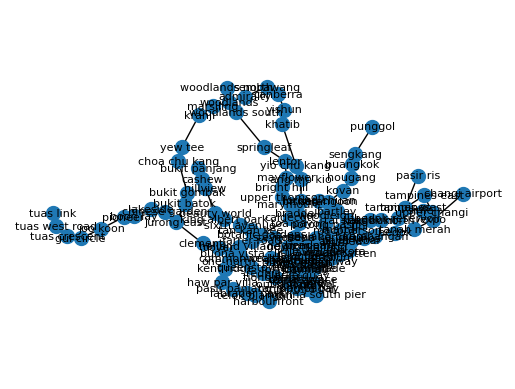

In [28]:
plot_mrt_graph(G, df_mrt_stations)


### 3.1 Implement Girvan-Newman Algorithm (4 Points)

The Girvan-Newman Algorithm finds communities in a graph by assuming a strongly connected graph and then iteratively removing a minimum set of edges until the graph breaks into 2 components. The criteria to remove an edge is based on the Edge Betweenness Centrality; cf. lecture slides. The Edge Betweenness Centrality $c_{B}(e)$ of an Edge $e$ given a Graph $G=(V,E)$ is defined as:

$$c_{B}(e) = \sum_{u,w\in V} \frac{\sigma(v,w|e)}{\sigma(v,w)}$$

where $\sigma(v,w)$ is the number of shortest paths from $v$ to $w$, and $\sigma(v,w|e)$ is the number of shortest paths from $v$ to $w$ going through Edge $e$.

Similar to the more traditional Betweenness Centrality for nodes, Edge Betweenness Centrality also fundamentally requires solving the All-Pairs Shortest Paths (APSP) problem. As such, we could again utilize [`nx.algorithms.shortest_paths`](https://networkx.org/documentation/stable/reference/algorithms/shortest_paths.html). However, it gets a bit tedious since we here need **all** shortest paths between **all** pairs of nodes. So you can simply use [`nx.algorithms.centrality.edge_betweenness_centrality`](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.edge_betweenness_centrality.html) here.

**Implement the method `girvan_newman()` split a Graph G into 2 components!** You can assume that the Graph is undirected, unweighted, and strongly connected. Together with being able to use So you can simply use [`nx.algorithms.centrality.edge_betweenness_centrality`](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.edge_betweenness_centrality.html), this should make it a rather straightforward task. Here are 2 additional constraints:

* If 2 or more edges have the same maximum edge centrality, still remove only **1 edge** per iteration (you can randomly pick one of the edges with maximum edge centrality)
* Include a print statement that shows which edge has been removed in an iteration (see given code of method `girvan_newman()`); this is merely so you can check your implementation with the expected outcome below.


In [35]:
communities, G_split = girvan_newman(G, verbose=True)

Edge ('farrer road', 'botanic gardens') removed (edge betweenness centrality: 0.211)
Edge ('outram park', 'tiong bahru') removed (edge betweenness centrality: 0.217)
Edge ('harbourfront', 'outram park') removed (edge betweenness centrality: 0.245)
Edge ('marsiling', 'woodlands') removed (edge betweenness centrality: 0.380)


The expect output for the code cell above is:

```
Edge ('farrer road', 'botanic gardens') removed (edge betweenness centrality: 0.211)
Edge ('outram park', 'tiong bahru') removed (edge betweenness centrality: 0.217)
Edge ('harbourfront', 'outram park') removed (edge betweenness centrality: 0.245)
Edge ('marsiling', 'woodlands') removed (edge betweenness centrality: 0.380)
```

The returned Graph `G_split` is the original graph without the edges that needed to be removed to split the original Graph `G` into 2 components. As such, we can now plot `G_split` to visualize the 2 components. You need to zoom in to the MRT connections that reflect the removed edges.

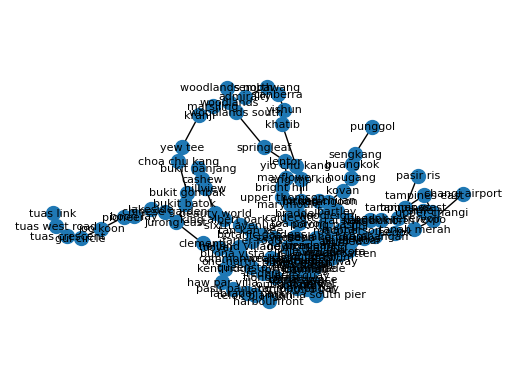

In [36]:
plot_mrt_graph(G_split, df_mrt_stations)

### 3.2 Question about Girvan-Newman Algorithm (6 Points)

This is a markdown cell. Please fill in your answers for (1)~(3), 2 Points each.

| No. | Question                                                                                                   |  You Answer |
|---------------------------------|--------------| ------- |
| (1)  | `girvan_newman()` removes the edge with the largest Edge Betweenness Centrality value. For the 4 edges that get removed from the MRT Graph, why do the values increase after each iteration? | The values of edge betweenness centrality increase after each iteration because as edges are removed, the structure of the graph changes, often reducing the number of shortest paths available between nodes. This causes the remaining edges to carry a greater proportion of the total shortest paths, increasing their betweenness centrality values. With fewer paths, the existing edges become more critical in connecting the components of the graph. |
| (2)  | `girvan_newman()` always removes only one edge in each iteration even if 2 or more dges have the same maximum Edge Betweenness Centrality. Why is this meaningful, or why don't we remove all edge with the same maximum Edge Centrality in the same iteration? | Removing only one edge per iteration allows for controlled fragmentation of the graph and more gradual identification of community structures. If multiple edges with the same centrality were removed at once, it could lead to unintended over-fragmentation or disrupt the identification of natural communities. By removing edges incrementally, the algorithm can better assess how each removal impacts the connected components of the graph. |
| (3)  | `girvan_newman()` resolves ties by randomly picking one of the edges with the maximum Edge Betweenness Centrality. Are there better/smarter ways to pick which edge to choose | Yes, smarter strategies could include choosing the edge that, when removed, maximizes the modularity gain or the edge that connects the most distinct clusters of nodes. Another approach could be to select the edge that, when removed, results in the most balanced or evenly sized new components. These strategies can lead to a more meaningful split of the graph into communities rather than random selection.   |